<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [5]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [6]:
import csv
with open('sat_scores.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        print row

['State', 'Rate', 'Verbal', 'Math']
['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']
['NH', '72', '520', '516']
['RI', '71', '501', '499']
['PA', '71', '500', '499']
['VT', '69', '511', '506']
['ME', '69', '506', '500']
['VA', '68', '510', '501']
['DE', '67', '501', '499']
['MD', '65', '508', '510']
['NC', '65', '493', '499']
['GA', '63', '491', '489']
['IN', '60', '499', '501']
['SC', '57', '486', '488']
['DC', '56', '482', '474']
['OR', '55', '526', '526']
['FL', '54', '498', '499']
['WA', '53', '527', '527']
['TX', '53', '493', '499']
['HI', '52', '485', '515']
['AK', '51', '514', '510']
['CA', '51', '498', '517']
['AZ', '34', '523', '525']
['NV', '33', '509', '515']
['CO', '31', '539', '542']
['OH', '26', '534', '439']
['MT', '23', '539', '539']
['WV', '18', '527', '512']
['ID', '17', '543', '542']
['TN', '13', '562', '553']
['NM', '13', '551', '542']
['IL', '12', '576', '589']
['KY', '12', '550', '550']
['WY', '11', '547',

In [7]:
data = {}

for x in df.columns:
    data[x] = list(df[x])
    
print data

NameError: name 'df' is not defined

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [8]:
drug = pd.read_csv('./drug-use-by-age.csv')
sat = pd.read_csv('./sat_scores.csv')

In [10]:
new_sat=sat.drop(sat.index[-1])
new_sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


In [12]:
new_sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [13]:
new_sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [14]:
new_sat.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [15]:
#difference is, one looks nicer than the other

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [16]:
sat = pd.read_csv('./sat_scores.csv')

In [17]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [18]:
new_sat=sat.drop(sat.index[-1])
new_sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [19]:
dict = {'columns': new_sat.columns,
        'type': new_sat.dtypes,
        'description': new_sat.describe,
        'shape': new_sat.shape}
print(dict)

{'shape': (51, 4), 'type': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object, 'description': <bound method DataFrame.describe of    State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   43

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

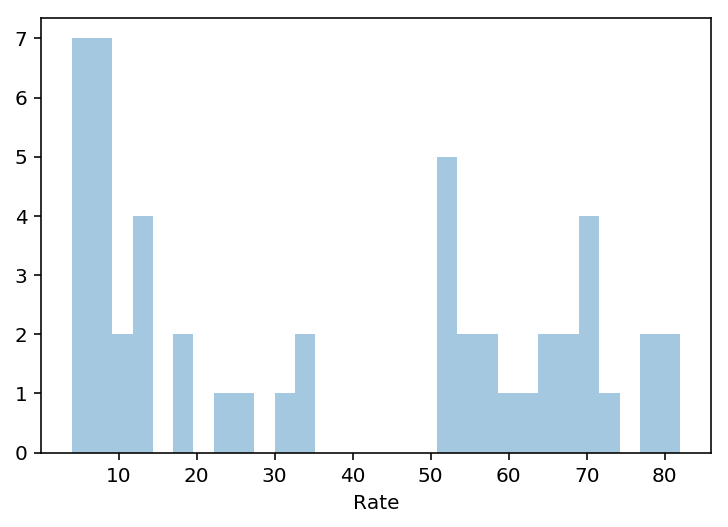

In [20]:
sns.distplot(new_sat['Rate'],kde=False,bins=30,label='Count')

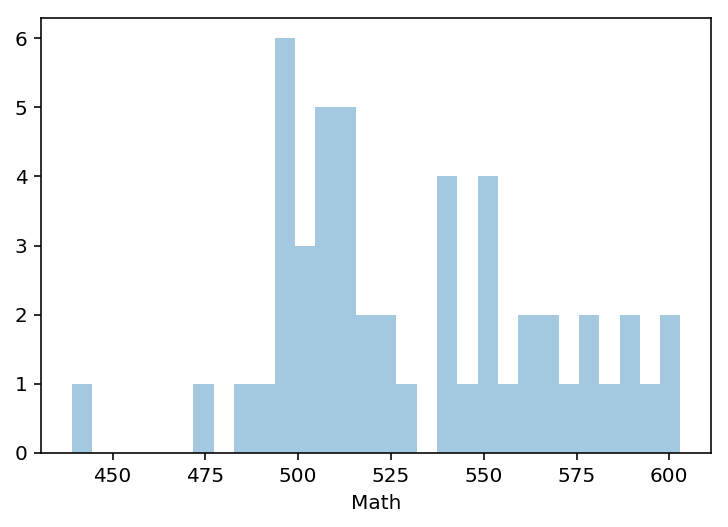

In [21]:
sns.distplot(new_sat['Math'],kde=False,bins=30)

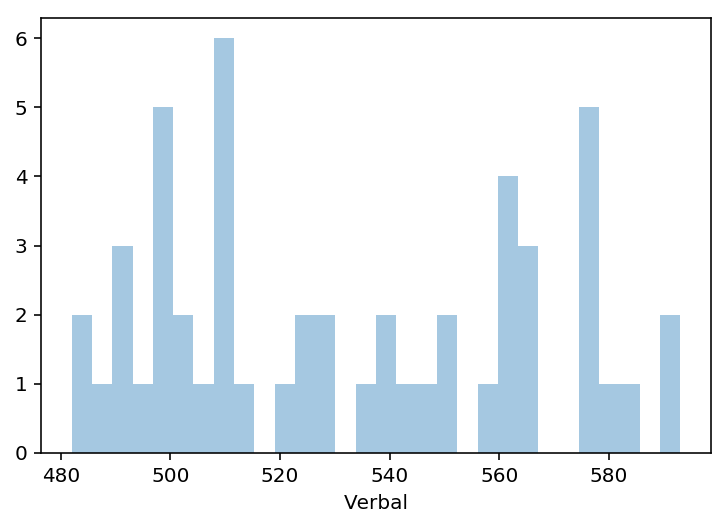

In [22]:
sns.distplot(new_sat['Verbal'],kde=False,bins=30)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

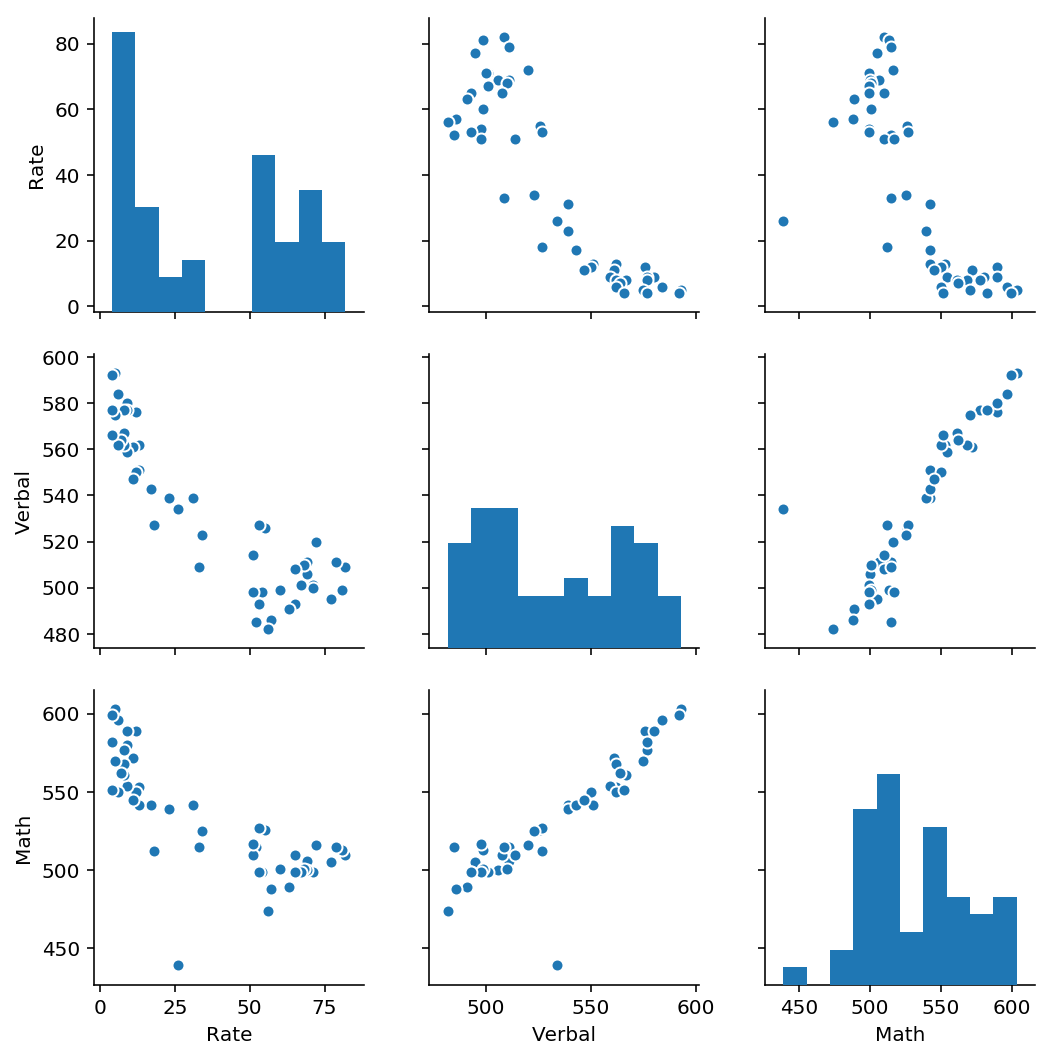

In [23]:
sns.pairplot(new_sat)

#those cities which have lower rate generally have higher Verbal and Math scores, ie, 'Verbal' and 'Math' scores are inversely related to 'Rate'.
#cities with high Math score also correlates with high Verbal score.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [25]:
#plot stacked histogram using Pandas
pd.DataFrame(new_sat('Verbal','Math')).hist(stacked=True,figsize=(16,4), bins=50)

TypeError: 'DataFrame' object is not callable

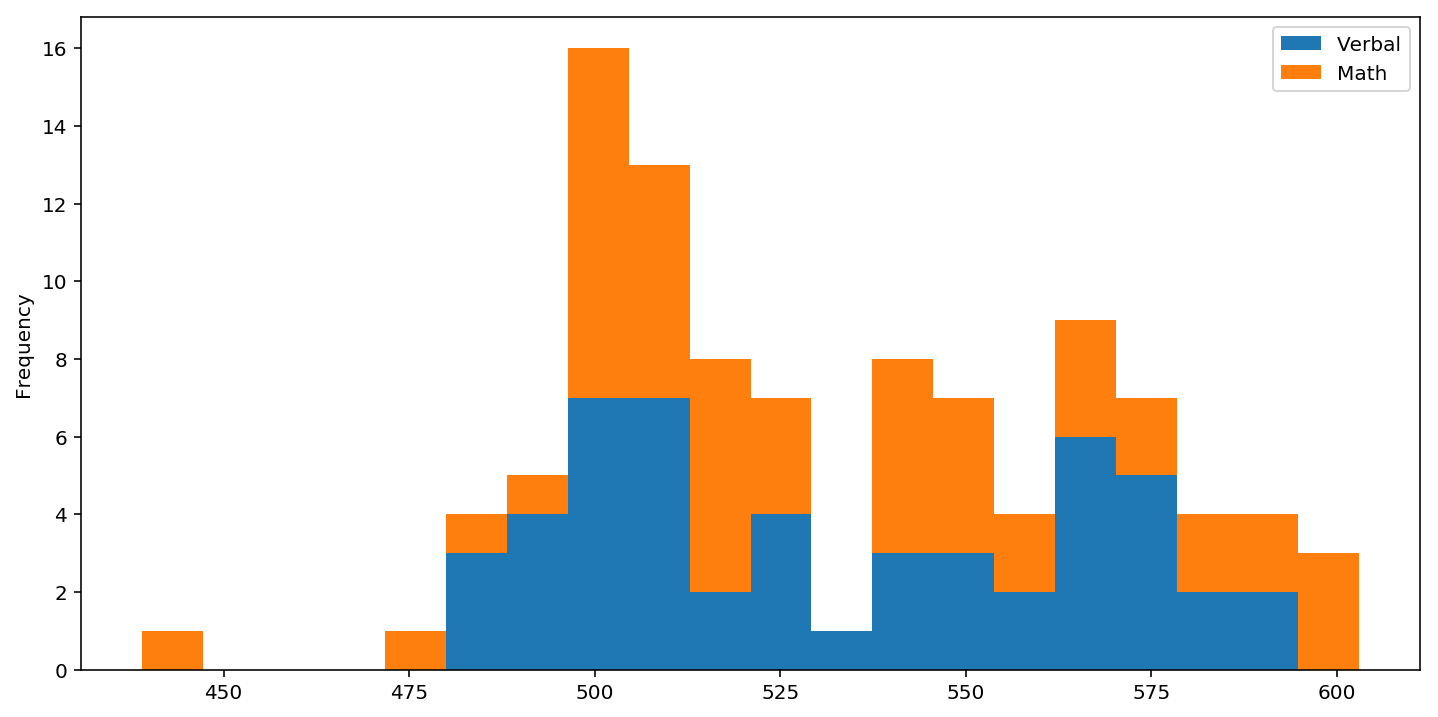

In [26]:
new_sat[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(12,6), bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

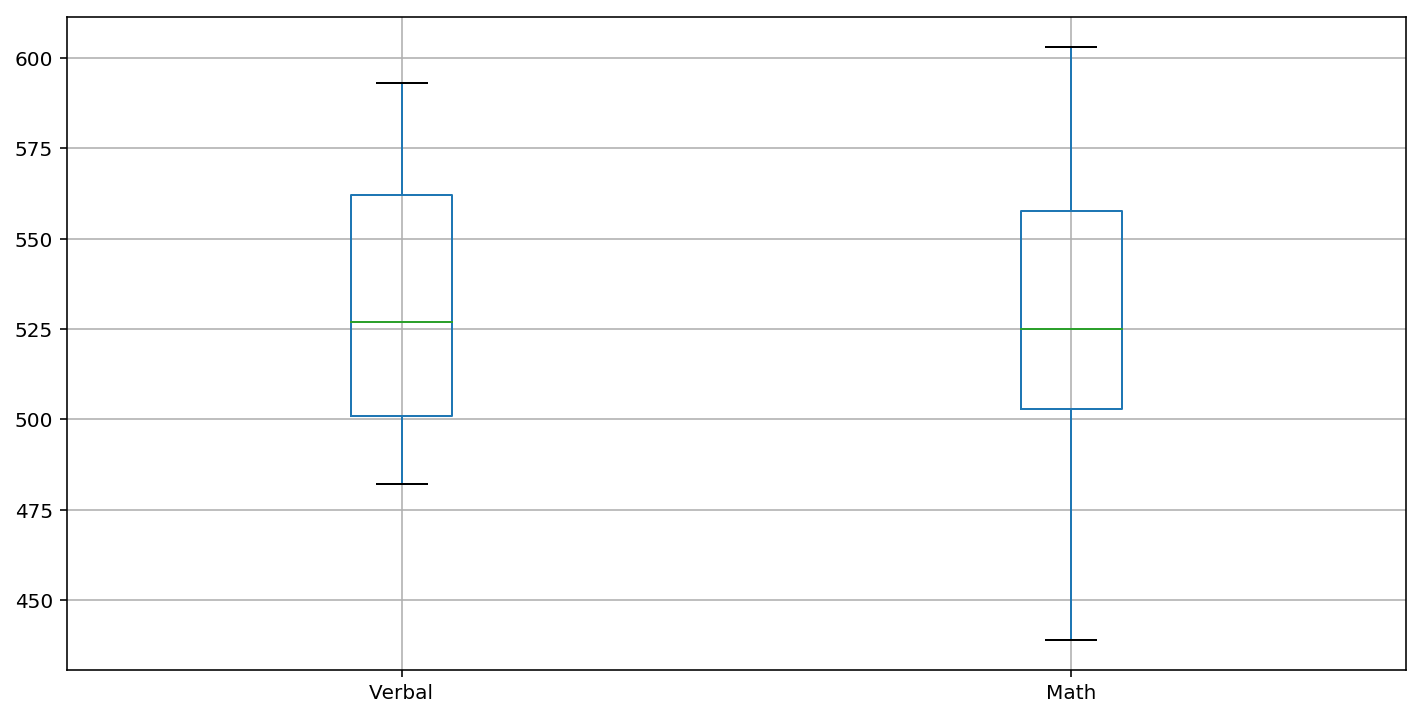

In [27]:
#boxplot of 'Verbal' and 'Math'
new_sat[['Verbal', 'Math']].plot(kind='box', figsize=(12,6),grid=True)

#Boxplot can indicate the median and scores at 25th and 75th percentiles and outliers easily.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


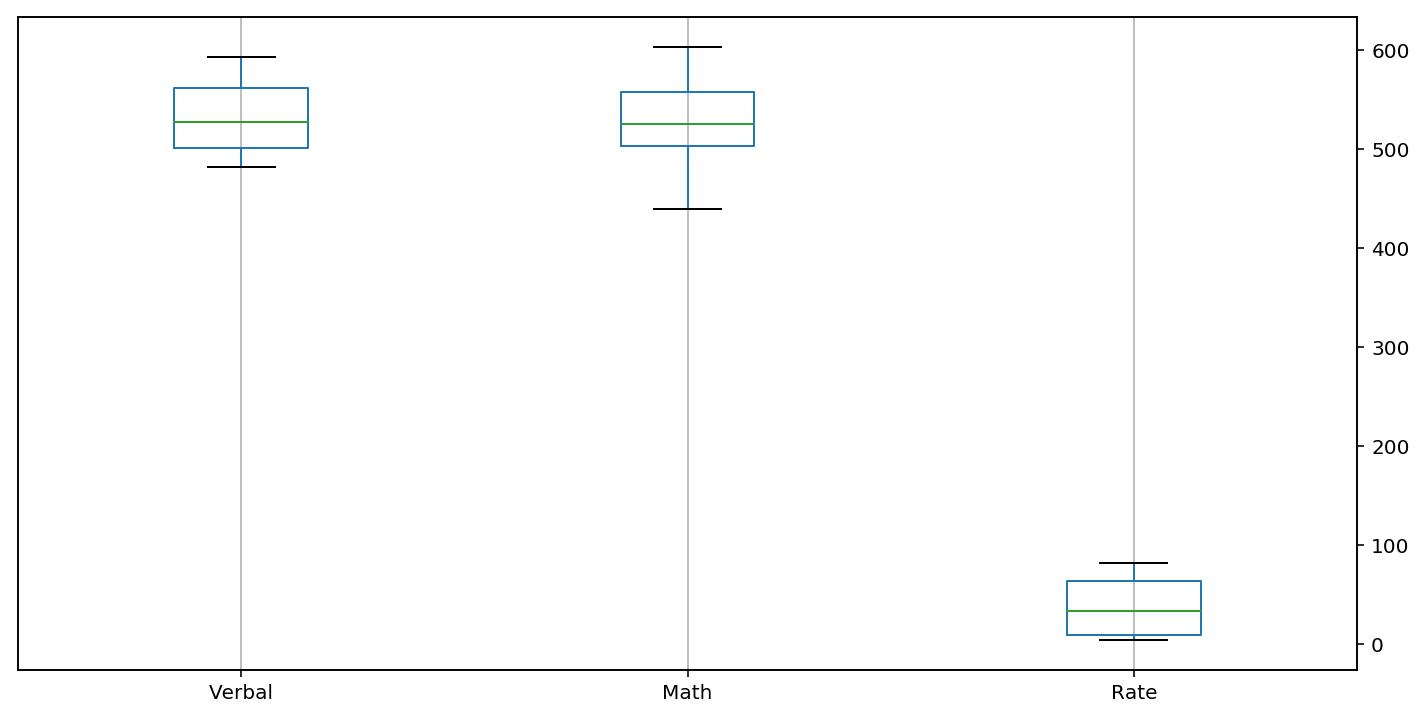

In [28]:
#boxplot of 'Verbal','Math' and 'Rate'
new_sat[['Verbal', 'Math','Rate']].plot(kind='box', figsize=(12,6),grid=True,secondary_y=True)

#The plots are hard to visualise together as the 'Rate' is on different scale from the other two, ie. 'Math' and 'Verbal'.

In [32]:
#Plotting the Standardized Variables Together
new_sat_mean = np.mean(new_sat)
new_sat_std = np.std(new_sat)
print new_sat_mean, new_sat_std

Rate       37.000000
Verbal    532.529412
Math      531.843137
dtype: float64 Rate      27.279239
Verbal    33.031983
Math      35.929873
dtype: float64


In [33]:
new_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [31]:
#sat.drop('State', axis=1, inplace=True)

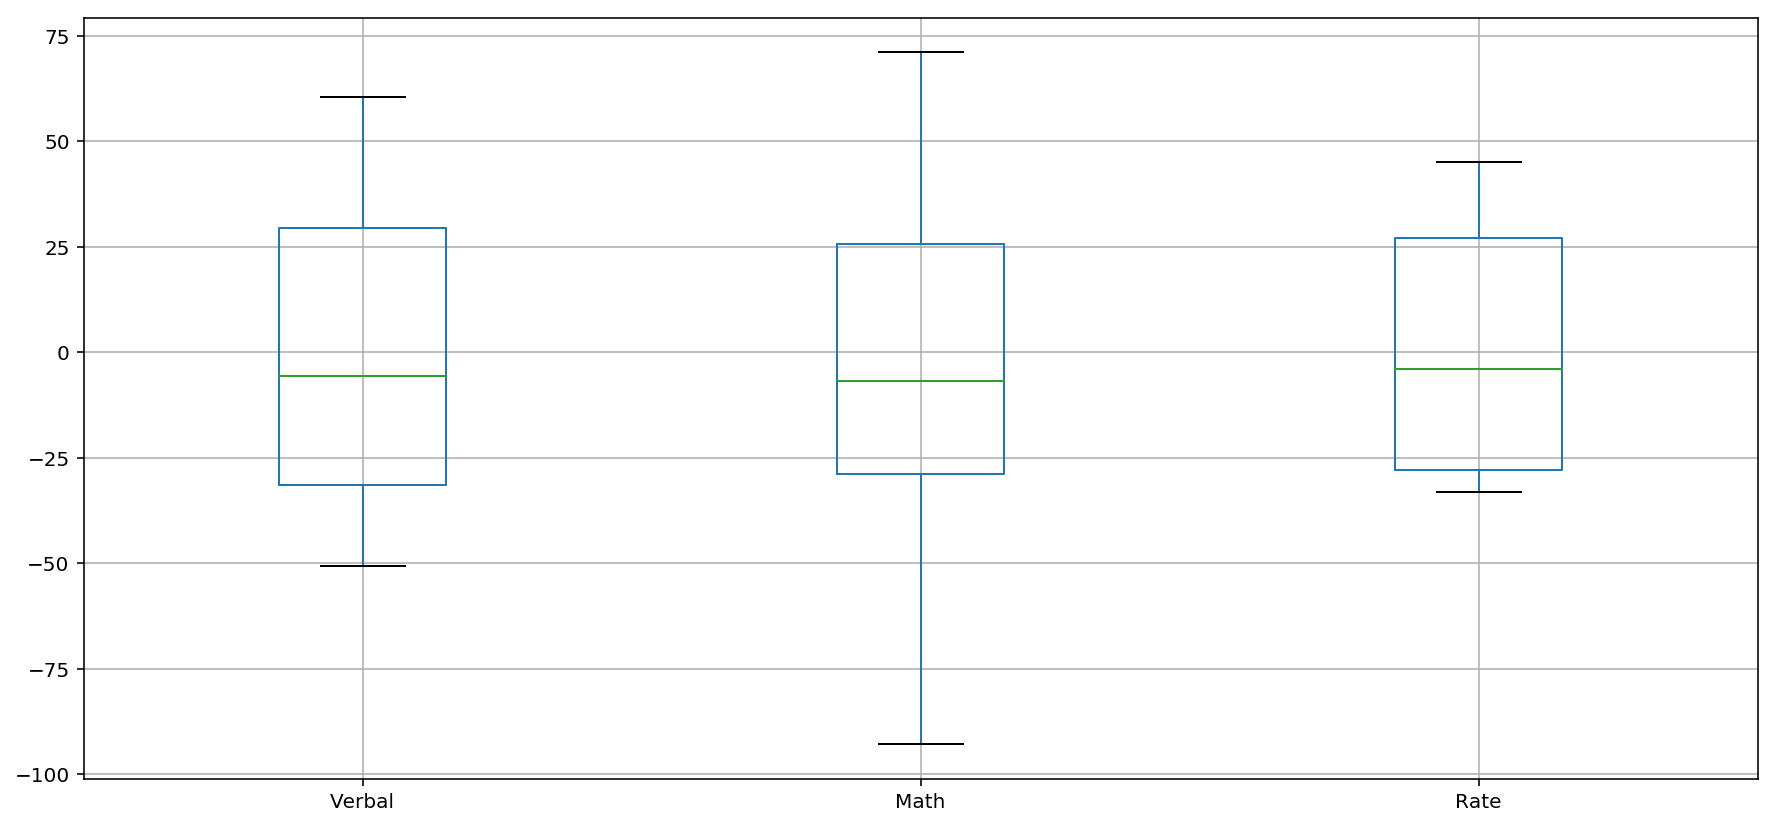

In [123]:
#Trying out method 1 to standardise scale
new_sat_scores2 = sat.copy()
new_sat_scores2['Verbal'] = new_sat['Verbal'] - np.mean(new_sat['Verbal'])
new_sat_scores2['Math'] = new_sat['Math'] - np.mean(new_sat['Math'])
new_sat_scores2['Rate'] = new_sat['Rate'] - np.mean(new_sat['Rate'])
new_sat_scores2.boxplot(['Verbal','Math', 'Rate'],figsize=(15, 7))
#sns.plt.title('Deviation from mean')

In [124]:
#Trying out method 2 to standardise values (normalising). works sometimes.
new_sat_norm = (new_sat - new_sat.mean()) / new_sat.std()       ##### Standardize all the variables in One step. But be careful !
####   All the variables must be numeric for this to work !!
print np.mean(new_sat_norm), np.std(new_sat_norm)

Rate             8.707632e-18
Verbal           9.447780e-16
Math            -8.424634e-16
Verbal - Math   -1.088454e-17
Percentile       3.831358e-16
dtype: float64 Rate             0.990148
Verbal           0.990148
Math             0.990148
Verbal - Math    0.990148
Percentile       0.990148
dtype: float64


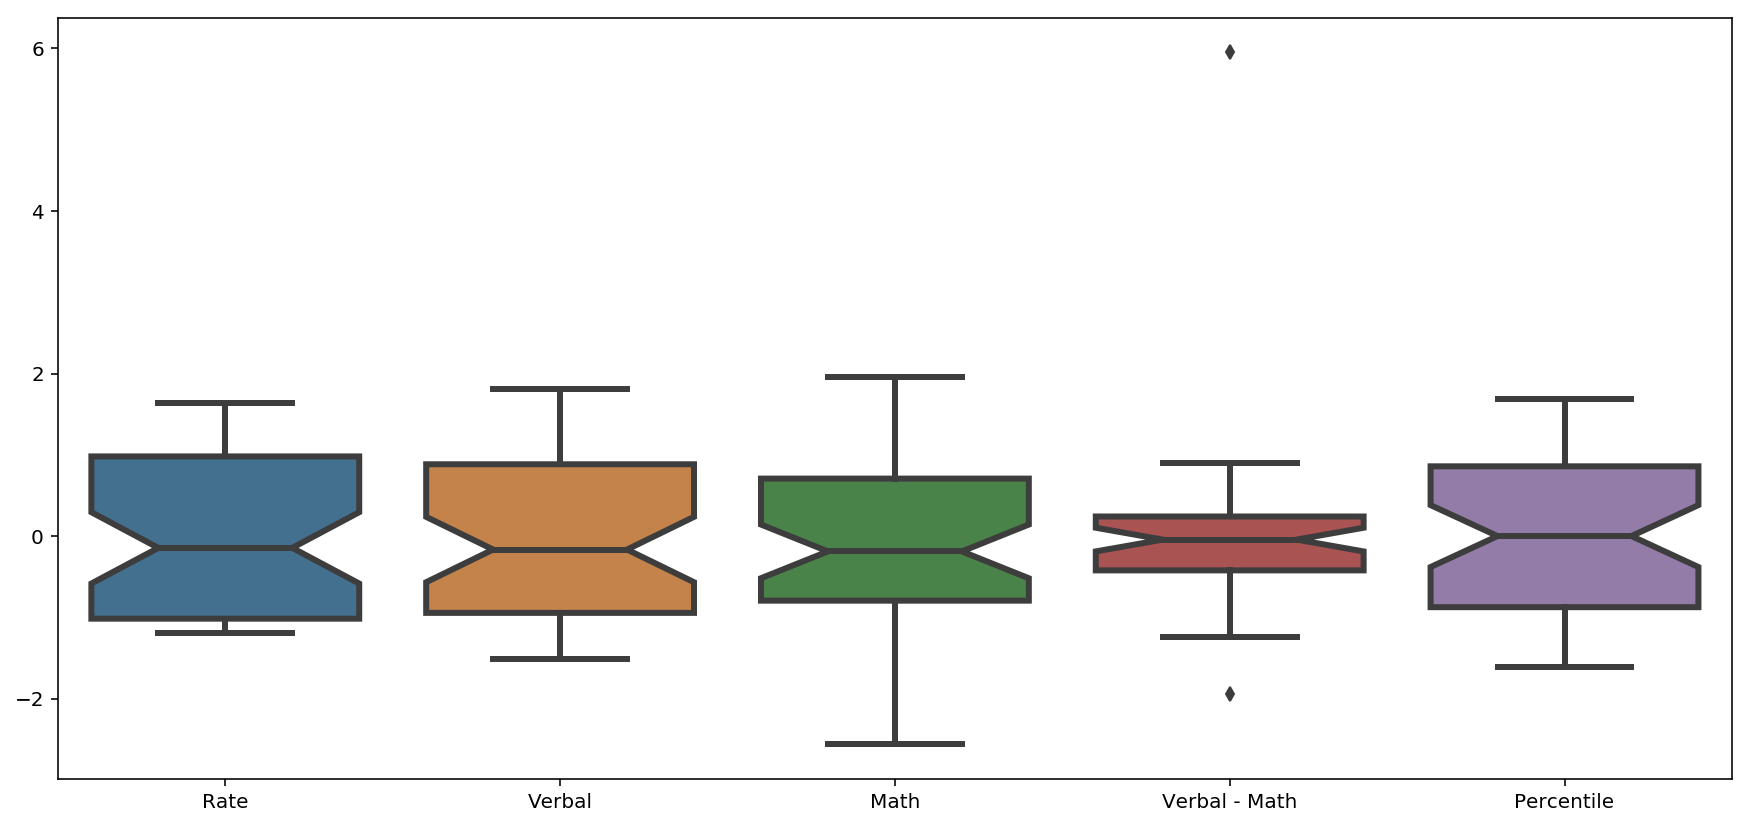

In [125]:
#plotting of standardised variables
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=new_sat_norm, orient='v', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [39]:
new_mean_verbal = new_sat.groupby(['State'])['Verbal'].mean().to_frame

In [40]:
new_mean_verbal

<bound method Series.to_frame of State
AK    514
AL    559
AR    562
AZ    523
CA    498
CO    539
CT    509
DC    482
DE    501
FL    498
GA    491
HI    485
IA    593
ID    543
IL    576
IN    499
KS    577
KY    550
LA    564
MA    511
MD    508
ME    506
MI    561
MN    580
MO    577
MS    566
MT    539
NC    493
ND    592
NE    562
NH    520
NJ    499
NM    551
NV    509
NY    495
OH    534
OK    567
OR    526
PA    500
RI    501
SC    486
SD    577
TN    562
TX    493
UT    575
VA    510
VT    511
WA    527
WI    584
WV    527
WY    547
Name: Verbal, dtype: int64>

In [41]:
print new_sat.mean()
print(new_sat.mean()[1])

Rate       37.000000
Verbal    532.529412
Math      531.843137
dtype: float64
532.5294117647059


In [42]:
verbal_abovemean=new_sat[new_sat['Verbal'] > (new_sat.mean()[1])].sort_values('Verbal', ascending=False)
verbal_abovemean

,State,Rate,Verbal,Math
47,IA,5,593,603
49,ND,4,592,599
44,WI,6,584,596
37,MN,9,580,589
48,SD,4,577,582
38,KS,9,577,580
42,MO,8,577,577
33,IL,12,576,589
46,UT,5,575,570
41,OK,8,567,561


In [43]:
new_sat.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [44]:
verbal_abovemean.count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

#These 24 states have Verbal scores above the mean and median.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [45]:
verbal_abovemedian=new_sat[new_sat['Verbal'] > (new_sat.median()[1])].sort_values('Verbal', ascending=False)
verbal_abovemedian

,State,Rate,Verbal,Math
47,IA,5,593,603
49,ND,4,592,599
44,WI,6,584,596
37,MN,9,580,589
48,SD,4,577,582
38,KS,9,577,580
42,MO,8,577,577
33,IL,12,576,589
46,UT,5,575,570
41,OK,8,567,561


In [46]:
verbal_abovemedian.count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

#There are 26 states above median. Since all 24 states in above mean are among the 26 states above the median, the mean is higher than the median. The data seems to skew to the right.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [47]:
new_sat['Verbal - Math']=new_sat['Verbal'] - new_sat['Math']
new_sat.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [48]:
df1=new_sat.sort_values('Verbal - Math', ascending=False).head(10)
df1

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [49]:
df2=new_sat.sort_values('Verbal - Math', ascending=True).head(10)
df2

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


In [50]:
print df1.State[0:3].values
print df2.State[0:3].values

['OH' 'MS' 'WV']
['HI' 'CA' 'NJ']


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [51]:
new_sat.drop('State', axis=1, inplace=True)
new_sat.head(3)

,Rate,Verbal,Math,Verbal - Math
0,82,509,510,-1
1,81,499,513,-14
2,79,511,515,-4


In [68]:
new_sat.tail(2)

,Rate,Verbal,Math,Verbal - Math
49,4,592,599,-7
50,4,566,551,15


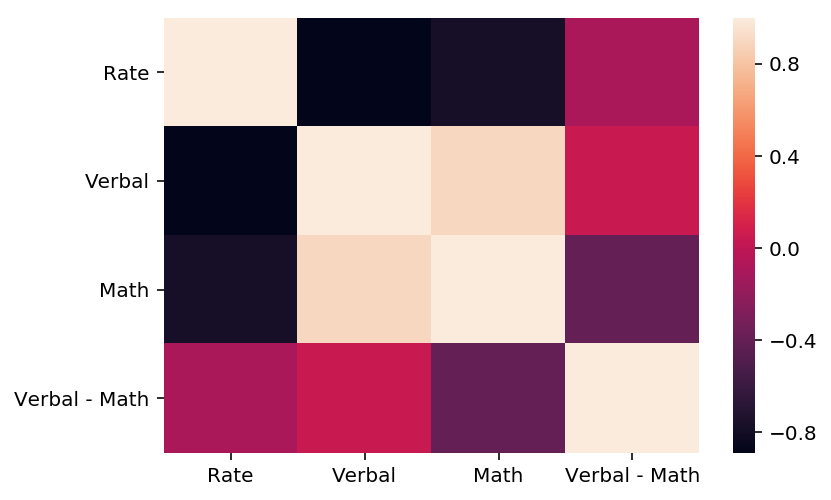

In [52]:
new_sat_correlations = new_sat.corr()     #seaborn heat map
sns.heatmap(new_sat_correlations)

#'Verbal','Math' and 'Verbal - Math' scores are inversely correlated to 'Rate'.
#cities with high Math score also correlates with high Verbal score. 'Verbal - Math' does not seem to have a positive correlation with either 'Math' or 'Verbal' too.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [53]:
new_sat.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


In general for all 3 areas of interest, "Rate", "Verbal" and "Math", the mean are higher than the median for all 52 states. 
The range of the 'Rate' is 78 (max=82, min=4), with a mean of 37.2.
The range of 'Verbal' is 111 (max= 593, min=482) with a mean of 532.
The range of 'Math' is 164 (max=603, min=439) with a mean of 532.

count: number of rows
mean: average rate for all states
std: standard deviation
min: minimum score or rate
25%: value at 1/4 of the data when sorted ascending
50%: value at 1/2 of the data when sorted ascending
75%: value at 3/4 of the data when sorted ascending
max: maximum score or value

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

1. The correlation matrix can be seen as the covariance matrix of the standardized random variables. Each element on the principal diagonal of a correlation matrix is the correlation of a random variable with itself, which always equals 1. Each off-diagonal element is between 1 and –1 inclusive.


2. First, use the DIAG function to extract the variances from the diagonal elements of the covariance matrix. Then invert the matrix to form the diagonal matrix with diagonal elements that are the reciprocals of the standard deviations.


3. The correlation matrix is the standardized version of the covariance matrix. Analysing the correlation matrix is a useful default method because it takes the standardized form of the matrix; therefore, if variables have been measured using different scales this will not affect the analysis. Often you will want to analyse variables that use different measurement scales. Analysing the correlation matrix ensures that differences in measurement scales are accounted for. In addition, even variables measured using the same scale can have very different variances and this too creates problems for principal component analysis. Using the correlation matrix eliminates this problem also. 

In [55]:
new_sat.cov()

,Rate,Verbal,Math,Verbal - Math
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal - Math,-43.06,23.529412,-227.370196,250.899608


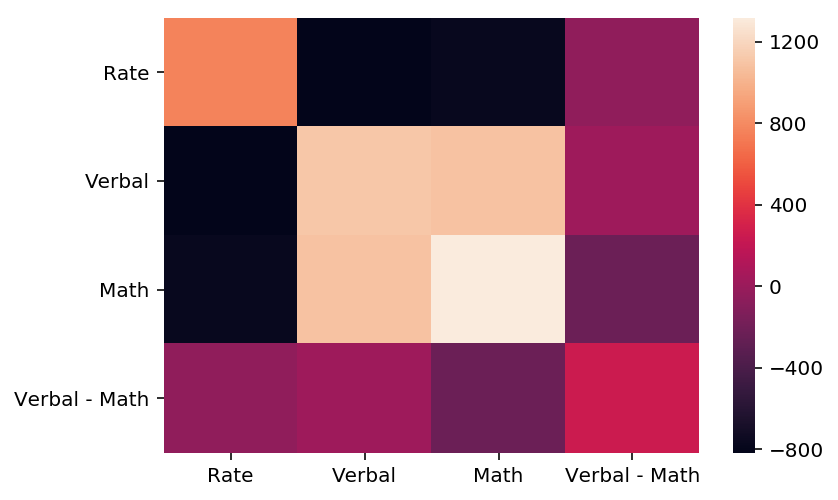

In [56]:
sns.heatmap(new_sat.cov())

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [57]:
drug.head(3)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


Yes, there are data missing or existing in other forms, eg. '-', and hence requires cleaning. This has caused the data in the entire column to be string type rather than integer for meaningful operations such as, finding mean, standard deviation etc. Also, due to missing information in some cells, the count is lowered but is compensated by the use of mean. 

In [58]:
#objects, not int
#The followings are found to be 'string' instead of 'integer'. meth-frequency','cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency'

In [59]:
#drug['cocaine-frequency'].describe()
drug['crack-frequency'].describe()
#drug['heroin-frequency'].describe()
#drug['inhalant-frequency'].describe()
#drug['oxycontin-frequency'].describe()
#drug['meth-frequency'].describe()

count     17
unique    13
top        -
freq       3
Name: crack-frequency, dtype: object

In [60]:
drug['cocaine-frequency'] = drug['cocaine-frequency'].replace('-',np.nan)
drug['crack-frequency'] = drug['crack-frequency'].replace('-',np.nan)
drug['heroin-frequency'] = drug['heroin-frequency'].replace('-',np.nan)
drug['inhalant-frequency'] = drug['inhalant-frequency'].replace('-',np.nan)
drug['oxycontin-frequency'] = drug['oxycontin-frequency'].replace('-',np.nan)
drug['meth-frequency'] = drug['meth-frequency'].replace('-',np.nan)

In [61]:
#drug['cocaine-frequency']
#drug['crack-frequency']
#drug['heroin-frequency']
#drug['inhalant-frequency']
#drug['oxycontin-frequency']
drug['meth-frequency']

0       NaN
1       5.0
2      24.0
3      10.5
4      36.0
5      48.0
6      12.0
7     105.0
8      12.0
9       2.0
10     46.0
11     21.0
12     30.0
13     54.0
14    104.0
15     30.0
16      NaN
Name: meth-frequency, dtype: object

In [62]:
drug['cocaine-frequency'] = drug['cocaine-frequency'].map(lambda x: float(x))
drug['crack-frequency'] = drug['crack-frequency'].map(lambda x: float(x))
drug['heroin-frequency'] = drug['heroin-frequency'].map(lambda x: float(x))
drug['inhalant-frequency'] = drug['inhalant-frequency'].map(lambda x: float(x))
drug['oxycontin-frequency'] = drug['oxycontin-frequency'].map(lambda x: float(x))
drug['meth-frequency'] = drug['meth-frequency'].map(lambda x: float(x))
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [63]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [112]:
#to see only Frequency
drug = pd.read_csv('./drug-use-by-age.csv')
drug_frequency=drug.drop(list(drug.filter(regex = '-use')), axis = 1, inplace = True)
drug.head()

,age,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,2798,3.0,4.0,5.0,-,35.5,52.0,19.0,36.0,24.5,52.0,2.0,-,13.0
1,13,2757,6.0,15.0,1.0,3.0,-,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,2792,5.0,24.0,5.5,-,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [113]:
#For correlation of Frequency Only
drug.corr()

,n,alcohol-frequency,marijuana-frequency,hallucinogen-frequency,pain-releiver-frequency,tranquilizer-frequency,stimulant-frequency,sedative-frequency
n,1.000000,0.313431,0.135597,0.008743,-0.112076,-0.102301,-0.114792,0.256701
alcohol-frequency,0.313431,1.000000,0.818769,-0.174622,0.007087,-0.415026,0.260304,0.201423
marijuana-frequency,0.135597,0.818769,1.000000,-0.380430,-0.285292,-0.591449,-0.069454,0.048777
hallucinogen-frequency,0.008743,-0.174622,-0.380430,1.000000,0.547363,0.705734,-0.103980,0.533095
pain-releiver-frequency,-0.112076,0.007087,-0.285292,0.547363,1.000000,0.699282,0.324717,-0.045213
tranquilizer-frequency,-0.102301,-0.415026,-0.591449,0.705734,0.699282,1.000000,-0.180415,-0.014524
stimulant-frequency,-0.114792,0.260304,-0.069454,-0.103980,0.324717,-0.180415,1.000000,-0.011796
sedative-frequency,0.256701,0.201423,0.048777,0.533095,-0.045213,-0.014524,-0.011796,1.000000


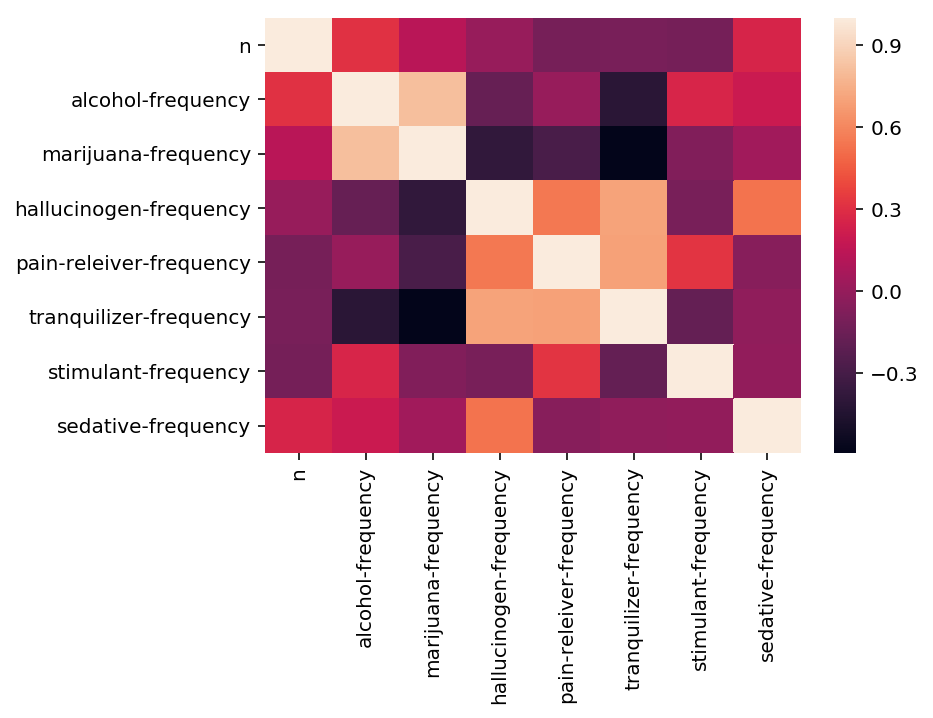

In [114]:
#For heatmap of Frequency Only
sns.heatmap(drug.corr())

#From Frequency only, marijuana-frequency has a high positive correlation with alcohol-frequency
#Tranquiliser-frequency has high negative correlation with marijuana-frequency

In [108]:
#to see only Use
drug = pd.read_csv('./drug-use-by-age.csv')
drug_frequency=drug.drop(list(drug.filter(regex = '-frequency')), axis = 1, inplace = True)
drug

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [110]:
#For correlation of Use Only
drug.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.281797,0.007798,-0.295302,0.008743,...,-0.083587,-0.112076,-0.166039,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.877378,0.677614,0.463702,-0.346643,...,0.617523,-0.263721,0.589219,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.785050,0.546194,0.182184,-0.174622,...,0.280704,0.007087,0.251554,0.448543,-0.415026,0.291766,0.260304,0.425153,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,0.620670,0.711613,0.959353,-0.478286,...,0.966226,-0.506892,0.971733,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.892077,0.631789,0.528733,-0.380430,...,0.612254,-0.285292,0.609618,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,0.835727,0.899944,0.855668,-0.368402,...,0.906638,-0.273908,0.865626,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.461914,-0.159997
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,1.000000,0.750790,0.556222,-0.198968,...,0.652764,-0.203711,0.603003,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.438421,0.091676
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,0.750790,1.000000,0.683674,-0.302988,...,0.805868,-0.135961,0.775321,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.333649,-0.023708
hallucinogen-use,-0.295302,0.463702,0.182184,0.959353,0.528733,0.855668,0.556222,0.683674,1.000000,-0.427863,...,0.909333,-0.419961,0.916777,0.862900,-0.314281,0.940008,-0.319860,0.780071,0.518700,-0.312746
hallucinogen-frequency,0.008743,-0.346643,-0.174622,-0.478286,-0.380430,-0.368402,-0.198968,-0.302988,-0.427863,1.000000,...,-0.488187,0.547363,-0.442181,-0.458016,0.705734,-0.452345,-0.103980,-0.432520,-0.231773,0.533095


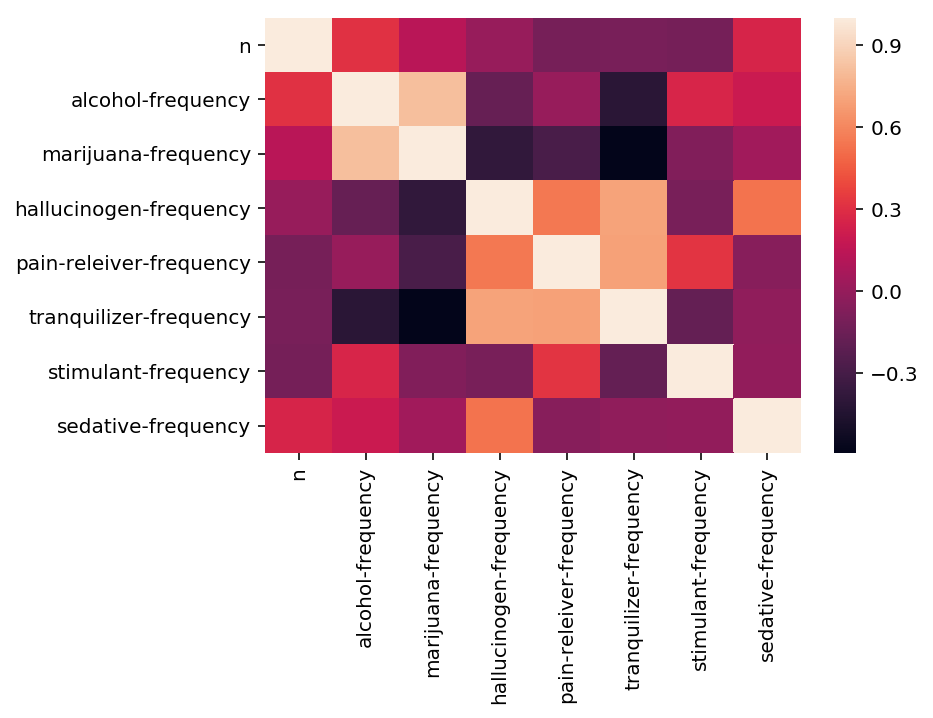

In [115]:
#For heatmap of Use Only
sns.heatmap(drug.corr())

#From Use only, marijuana-use has a high positive correlation with alcohol-use
#Tranquiliser-use has high negative correlation with marijuana-use

In [109]:
#For combined Use and Frequency
drug = pd.read_csv('./drug-use-by-age.csv')
drug.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.281797,0.007798,-0.295302,0.008743,...,-0.083587,-0.112076,-0.166039,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.877378,0.677614,0.463702,-0.346643,...,0.617523,-0.263721,0.589219,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.785050,0.546194,0.182184,-0.174622,...,0.280704,0.007087,0.251554,0.448543,-0.415026,0.291766,0.260304,0.425153,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,0.620670,0.711613,0.959353,-0.478286,...,0.966226,-0.506892,0.971733,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.892077,0.631789,0.528733,-0.380430,...,0.612254,-0.285292,0.609618,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,0.835727,0.899944,0.855668,-0.368402,...,0.906638,-0.273908,0.865626,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.461914,-0.159997
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,1.000000,0.750790,0.556222,-0.198968,...,0.652764,-0.203711,0.603003,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.438421,0.091676
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,0.750790,1.000000,0.683674,-0.302988,...,0.805868,-0.135961,0.775321,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.333649,-0.023708
hallucinogen-use,-0.295302,0.463702,0.182184,0.959353,0.528733,0.855668,0.556222,0.683674,1.000000,-0.427863,...,0.909333,-0.419961,0.916777,0.862900,-0.314281,0.940008,-0.319860,0.780071,0.518700,-0.312746
hallucinogen-frequency,0.008743,-0.346643,-0.174622,-0.478286,-0.380430,-0.368402,-0.198968,-0.302988,-0.427863,1.000000,...,-0.488187,0.547363,-0.442181,-0.458016,0.705734,-0.452345,-0.103980,-0.432520,-0.231773,0.533095


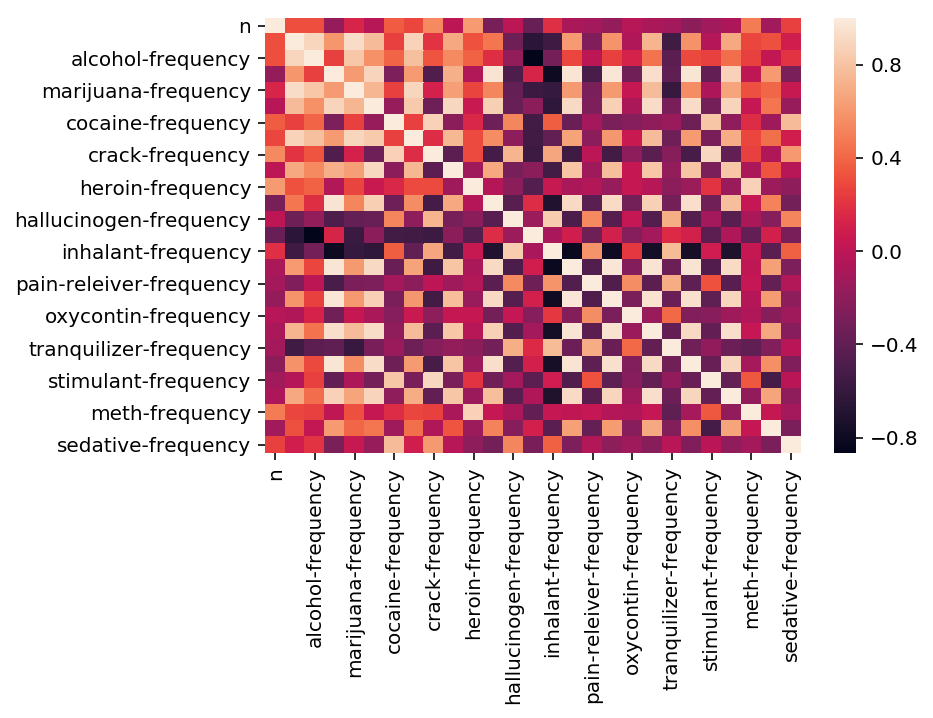

In [65]:
#For combined Use and Frequency
sns.heatmap(drug.corr())

In [66]:
sns.pairplot(drug.corr())

{'boxes': [<matplotlib.lines.Line2D at 0x1a4aab0e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3145f190>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a2e3d9890>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a4aaf1c90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a313c70d0>,
  <matplotlib.lines.Line2D at 0x1a4ae92f50>]}

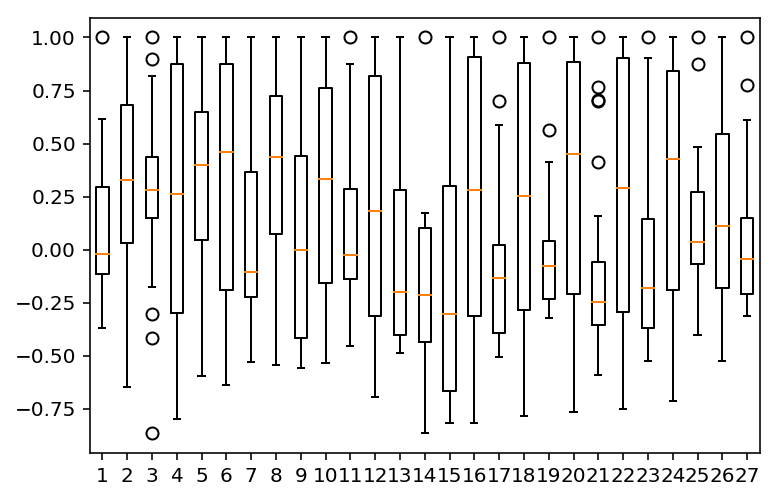

In [67]:
plt.boxplot(drug.corr())

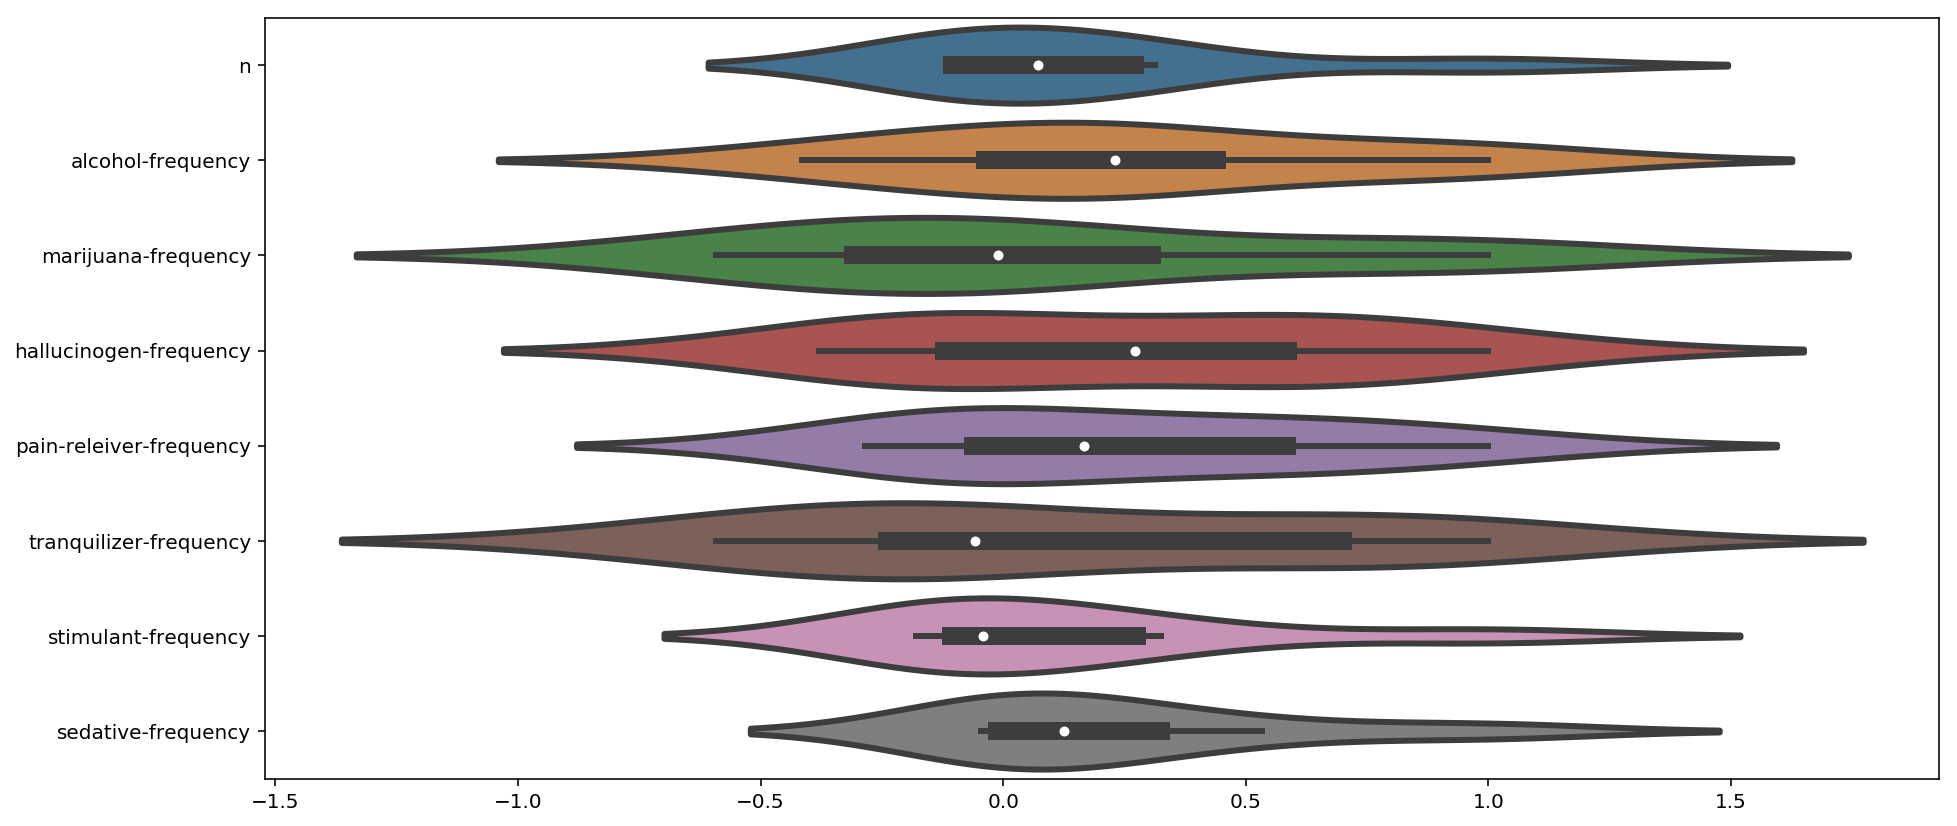

In [119]:
#Visualising on violinplot
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

ax = sns.violinplot(data=drug.corr(), orient='h', fliersize=5, scale='width',
                 linewidth=3, notch=False, saturation=0.5, ax=ax, inner='box')
plt.show()


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

# Code
From the heatmap generated above

#From Use only, marijuana-use has a high positive correlation with alcohol-use
#Tranquiliser-use has high negative correlation with marijuana-use

H0: There is no relationship between Tranquiliser-use and marijuana-use.
H1: There is high negative correlation between Tranquiliser-use and marijuana-use.

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [70]:
rate = new_sat.Rate
rate.describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

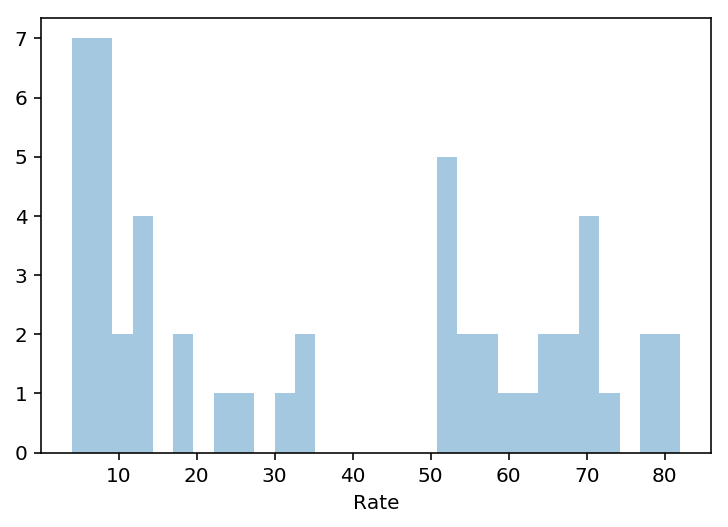

In [71]:
sns.distplot(rate, kde=False, bins=30)

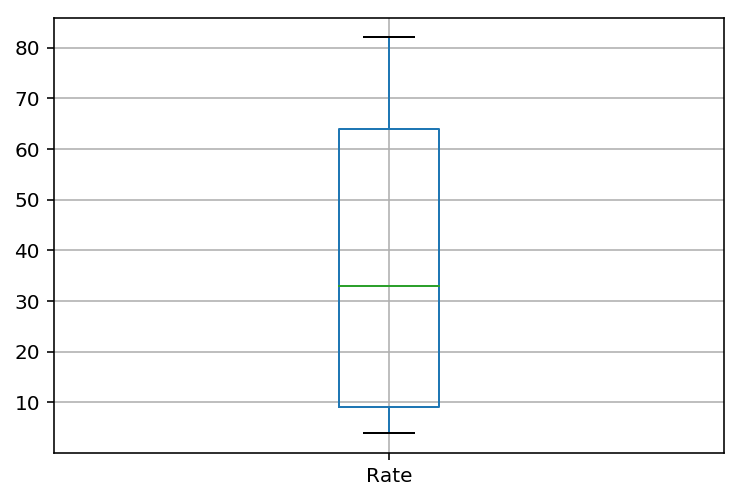

In [72]:
new_sat.boxplot('Rate')

There is no outlier. Since it is within 1.5 times the IQR below the first – or 1.5 times the IQR above the third – quartile.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [73]:
stats.spearmanr(new_sat['Verbal'], new_sat['Math'])

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

In [74]:
stats.pearsonr(new_sat['Verbal'], new_sat['Math'])

(0.8999093181811048, 2.735579353543464e-19)

Both correlations have similar results
The spearman correlation is equal to the Pearson correlation of the ranked variables after being sorted.
The Pearson correlation is calculated by dividing the covariance of the two variables by the product of their standard deviations.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [99]:
percentiles = []
for i in rate:
    percentiles.append(stats.percentileofscore(rate, i))
new_sat['Percentile'] = percentiles
new_sat.head()

,Rate,Verbal,Math,Verbal - Math,Percentile
0,82,509,510,-1,100.000000
1,81,499,513,-14,98.039216
2,79,511,515,-4,96.078431
3,77,495,505,-10,94.117647
4,72,520,516,4,92.156863


In [98]:
sat[sat['State'] == 'CA']
#because I have earlier dropped 'State' column in the new_sat that has the percentile.

,State,Rate,Verbal,Math
23,CA,51,498,517


In [97]:
new_sat[new_sat['Rate']==51]
#Rate for CA is 51, hence it is at 56th percentile (at index 23).

,Rate,Verbal,Math,Verbal - Math,Percentile
22,51,514,510,4,55.882353
23,51,498,517,-19,55.882353


# The Spearman

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Any data point that fell outside of either 1.5 times the IQR below the first – or 1.5 times the IQR above the third – quartile to be “outside”

In [78]:
alcohol_sm = stats.spearmanr(drug['alcohol-frequency'], drug['alcohol-use'])
alcohol_sm

SpearmanrResult(correlation=0.8790475323984228, pvalue=3.384896543824415e-06)

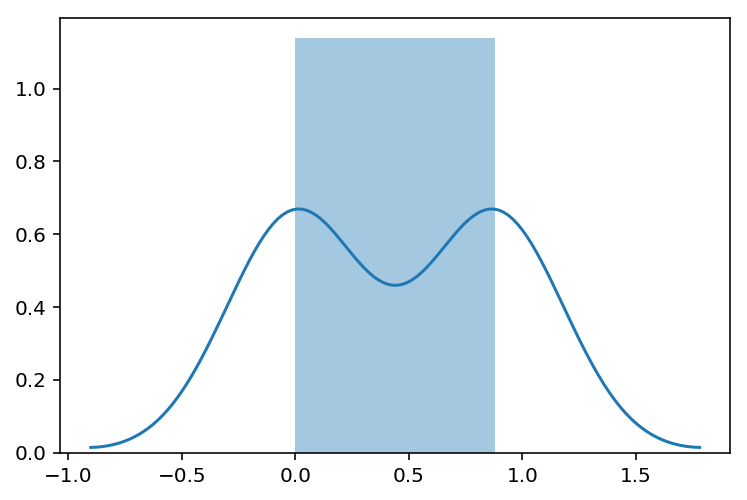

In [79]:
sns.distplot(alcohol_sm)

In [83]:
stats.percentileofscore(alcohol_sm, 0.5, kind='mean')

50.0

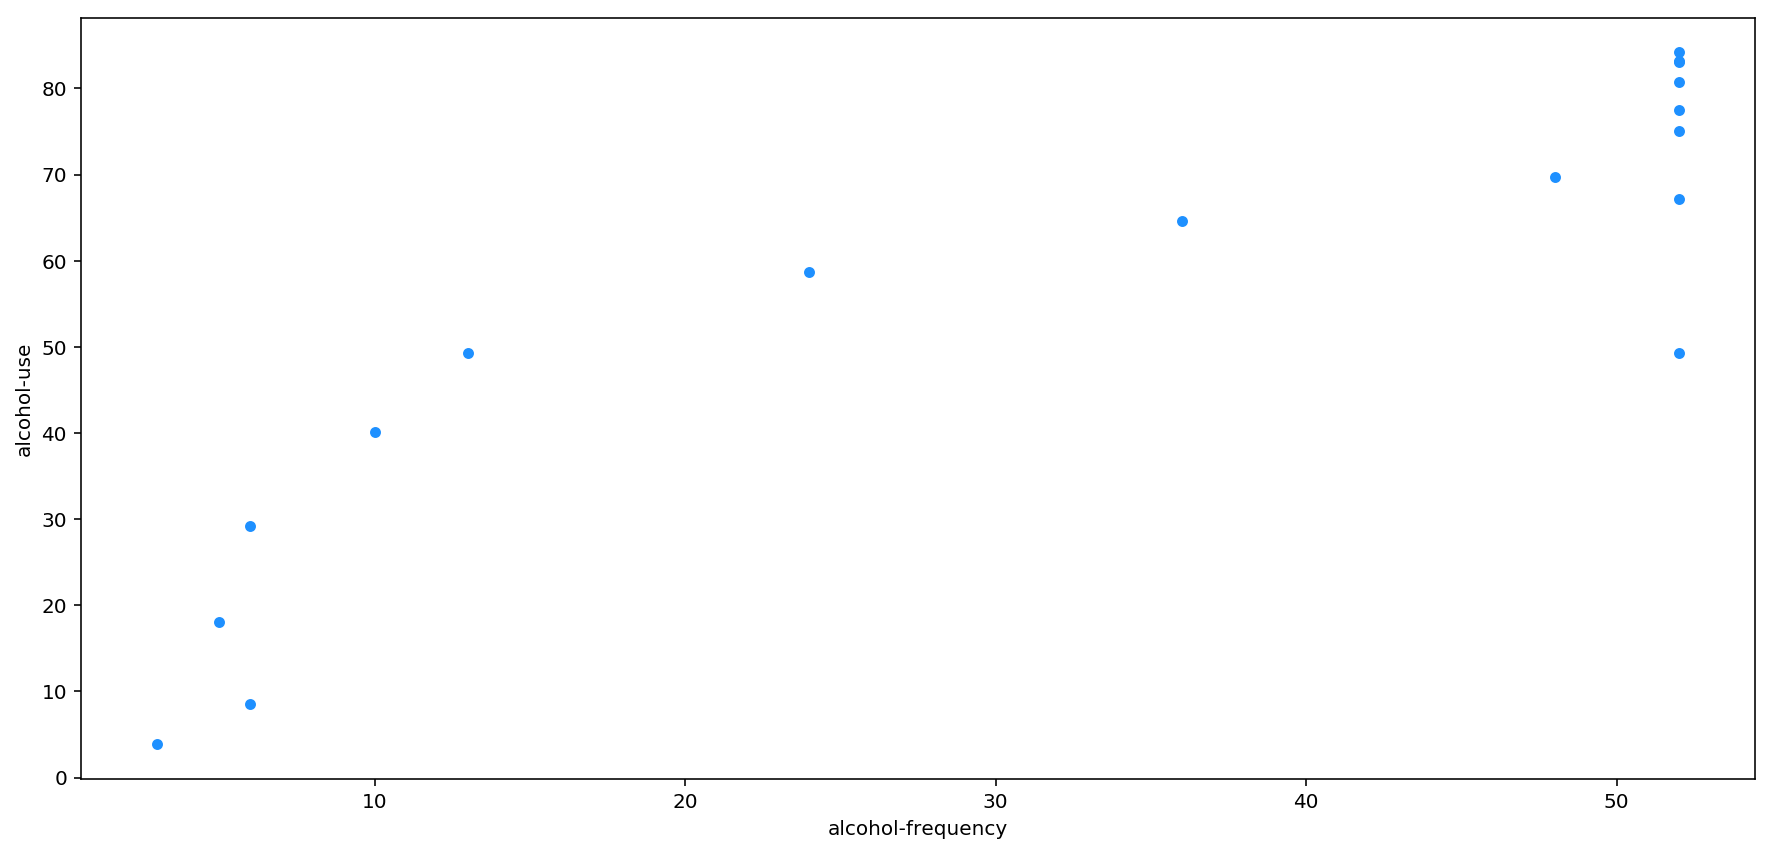

In [80]:
drug.plot(x='alcohol-frequency', y='alcohol-use', kind='scatter', color='dodgerblue',figsize=(15,7))